## Лабораторная работа 7.1

In [5]:
import pandas as pd
import xlwings as xw
import random

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [6]:
reviews = pd.read_csv('reviews_sample.csv', index_col=0)
recipes = pd.read_csv('recipes_sample.csv', index_col=0)

2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [7]:
reviews_sample = reviews.sample(frac=0.05, random_state=42)
recipes_sample = recipes.sample(frac=0.05, random_state=42)

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [14]:
with pd.ExcelWriter('recipes.xlsx') as writer:
    recipes_sample.to_excel(writer, sheet_name='Рецепты')
    reviews_sample.to_excel(writer, sheet_name='Отзывы')
recipes_wb = xw.Book('recipes.xlsx')
recipes_sheet = recipes_wb.sheets['Рецепты']
minutes_range = recipes_sheet.range('D2:D' + str(len(recipes_sample) + 1))
seconds_assign = [int(minutes * 60) for minutes in minutes_range.value]
recipes_sheet.range('G2').value = 'seconds_assign'
recipes_sheet.range('G3:G' + str(len(recipes_sample) + 1)).value = seconds_assign

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [15]:
recipes_sheet.range('H2').value = 'seconds_formula'
recipes_sheet.range('H3:H' + str(len(recipes_sample) + 1)).formula = '=D3*60'

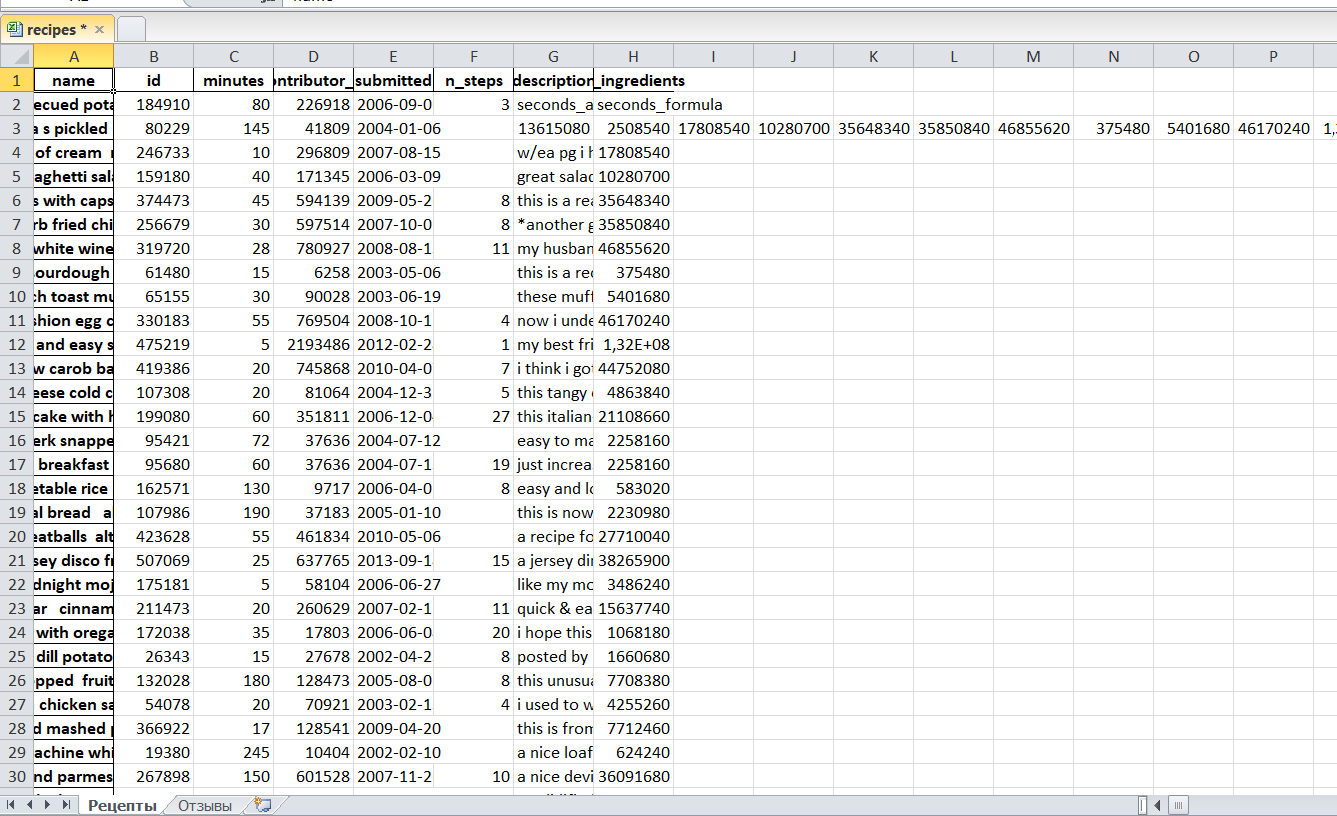

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [22]:
for col in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
    recipes_sheet.range(col + '1').api.Font.Bold = True
    recipes_sheet.range(col + '1').api.HorizontalAlignment = xw.constants.HAlign.Center
recipes_wb.save()

AttributeError: type object 'HAlign' has no attribute 'Center'

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [60]:
for i in range(2, len(recipes_sample)+2):
    minutes = recipes_sheet.range('D' + str(i)).value
    if minutes < 5:
        recipes_sheet.range('D' + str(i)).color = (0, 255, 0)
    elif minutes >= 5 and minutes <= 10:
        recipes_sheet.range('D' + str(i)).color = (255, 255, 0)
    else:
        recipes_sheet.range('D' + str(i)).color = (255, 0, 0)

com_error: (-2147023174, 'Сервер RPC недоступен.', None, None)

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [59]:
reviewscountformula = '=COUNTIFS(Отзывы!$C:$C,Рецепты!A3)'
recipes_sheet.range('I2').value = 'nreviews'
recipes_sheet.range('I3:I' + str(len(recipes_sample) + 1)).formula = reviewscountformula

com_error: (-2147023174, 'Сервер RPC недоступен.', None, None)

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [43]:
def validate():
    reviewssheet = recipes_wb.sheets['Отзывы']
    recipessheet = recipes_wb.sheets['Рецепты']
    maxrow = len(reviewssheet.range('A:A').value)
    for i in range(2, maxrow+1):
        rating = int(reviewssheet.range('D'+str(i)).value)
        recipeid = int(reviewssheet.range('C'+str(i)).value)
        if rating is not None and (rating < 0 or rating > 5):
            reviewssheet.range('A'+str(i)+':E'+str(i)).color = (255, 0, 0)
        elif recipeid not in recipessheet.range('A2:A'+str(len(recipessample)+1)).value:
            reviewssheet.range('A'+str(i)+':E'+str(i)).color = (255, 0, 0)
validate()

com_error: (-2147023174, 'Сервер RPC недоступен.', None, None)

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [51]:
recipesmodel = pd.read_csv('recipes_model.csv')
recipesmodelwb = xw.Book()
recipesmodelsheet = recipesmodelwb.sheets[0]
recipesmodelsheet.range('A2').value = recipesmodel

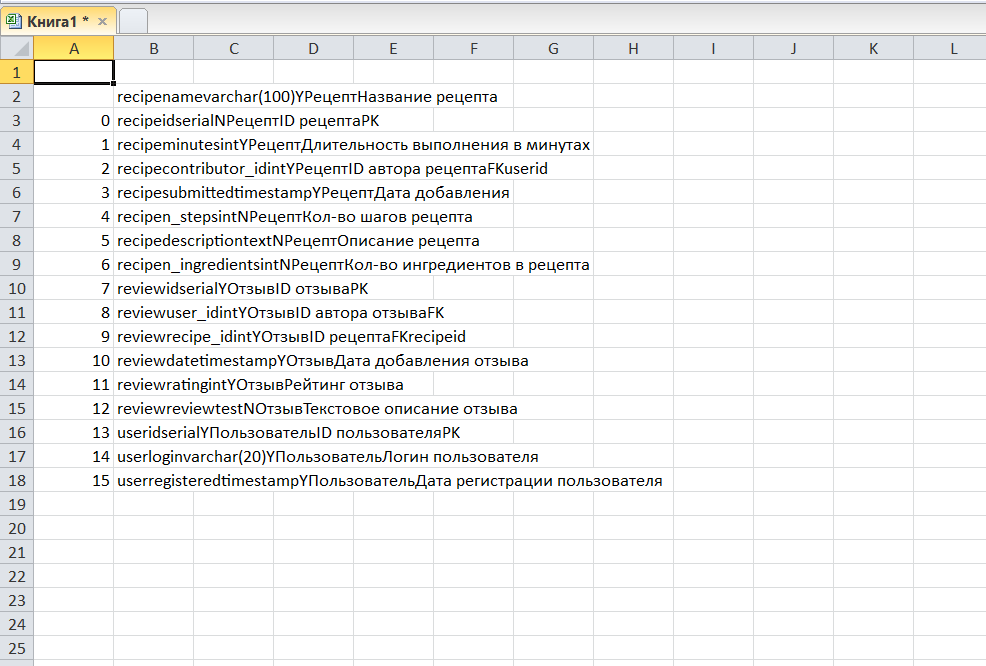


10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [56]:
lastrow = len(recipesmodel) + 1
formularange = recipesmodelsheet.range('J2:J' + str(lastrow))
for i in range(2, lastrow+1):
    bvalue = recipesmodelsheet.range('B'+str(i)).value
    cvalue = recipesmodelsheet.range('C'+str(i)).value
    keyvalue = recipesmodelsheet.range('D'+str(i)).value
    hvalue = recipesmodelsheet.range('H'+str(i)).value
    ivalue = recipesmodelsheet.range('I'+str(i)).value
    notnull = 'NOT NULL' if recipesmodelsheet.range('E'+str(i)).value == 'Y' and keyvalue != 'PK' else ''
    if keyvalue == 'PK':
        formularangei_2.formula = f'{bvalue} {cvalue} PRIMARY KEY {notnull}'
    elif keyvalue == 'FK':
        formularange[i-2].formula = f'{bvalue} {cvalue} REFERENCES {hvalue}({ivalue}) {notnull}'

com_error: (-2147023174, 'Сервер RPC недоступен.', None, None)

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [57]:
modelsheet = recipesmodelwb.sheets[0]
for col in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']:
    modelsheet.range(col + '1').api.Font.Bold = True
    modelsheet.range(col + '1').api.HorizontalAlignment = xw.constants.HAlign.Center
    modelsheet.range(col + '1').color = (0, 204, 255)
modelsheet.autofit()
modelsheet.setautofilter(modelsheet.range('A1:J1'))

com_error: (-2147023174, 'Сервер RPC недоступен.', None, None)

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [58]:
statisticswb = xw.Book()
statisticssheet = statisticswb.sheets0
statisticssheet.range('A1').value = recipesmodel.groupby('Entity')'Attribute'.count()
chart = statisticssheet.charts.add(charttype='columnclustered', left=100, top=100, width=600, height=400)
chart.setsourcedata(statisticssheet.range('A1:B'+str(len(recipesmodel.Entity.unique())+1)))
chart.api[1].Title.Caption = 'Количество атрибутов для каждой сущности'
chart.api[1].Axes(xlCategory).TickLabels.Orientation = 45
chart.api[1].Axes(xlCategory).TickLabels.Font.Size = 8
chart.api[1].Axes(xlValue).TickLabels.Font.Size = 10
chart.api[1].Axes(xlValue).MinimumScale = 0
chart.api[1].Axes(xlValue).MaximumScale = 20
chart.api[1].Axes(xlValue).MajorUnit = 2
chart.api[1].HasLegend = False
chart.api[1].ChartTitle.Font.Size = 12

SyntaxError: invalid syntax (1882302987.py, line 3)